The goal is to be able to predict if a person has heart disease given various attributes. We will look at various machine learning algorithms to perform this task. First, data needs to be split into training and testing sets.

In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, auc

In [127]:
data = pd.read_csv('after_preprocessing.csv')

In [128]:
#Normalise the columns
data.iloc[:,:-1]=data.iloc[:,:-1].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [129]:
#get dependent and independent variables
y = data['target'].values
X = data.drop(['target'], axis = 1)

In [130]:
X.shape

(302, 13)

In [131]:
y.shape

(302,)

In [132]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [133]:
X_train.shape

(241, 13)

In [134]:
y_train.shape

(241,)

## Logistic Regression
This is a regression analysis which can be performed when the dependent (target) variable is dichotmous (binary). Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. 

In [135]:
def modelAccuracy(X_test,y_test,y_pred):
    print("Number of mislabeled points out of a total %d points : %d"\
          % (X_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Precision Score: {:.2f}%".format(metrics.precision_score(y_test, y_pred)*100))
    print("Recall Score: {:.2f}%".format(metrics.recall_score(y_test, y_pred)*100))
    print("F1 Score: {:.2f}%".format(metrics.f1_score(y_test, y_pred)*100))
    cf_matrix=metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cf_matrix)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True)
    plt.show()

Training Results:
Number of mislabeled points out of a total 241 points : 40
Accuracy: 83.40%
Precision Score: 81.25%
Recall Score: 90.00%
F1 Score: 85.40%
Confusion Matrix:
[[ 84  27]
 [ 13 117]]


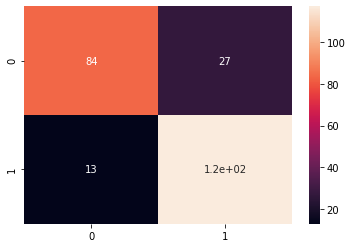

Testing Results
Number of mislabeled points out of a total 61 points : 7
Accuracy: 88.52%
Precision Score: 88.57%
Recall Score: 91.18%
F1 Score: 89.86%
Confusion Matrix:
[[23  4]
 [ 3 31]]


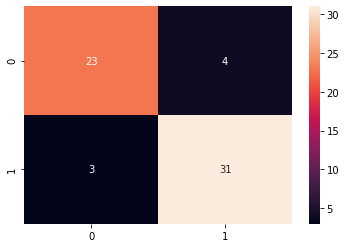

In [136]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

#save the model
pickle.dump(lr, open('models/LogisticRegression.sav', 'wb'))

#Training accuracy
y_pred=lr.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=lr.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


Area under the curve(AUC value): 0.9215686274509804


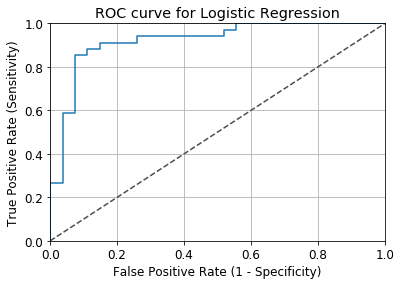

In [171]:
y_pred_quant = lr.predict_proba(X_test)[:, 1]
y_pred_bin = lr.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)  

print("Area under the curve(AUC value):",auc(fpr, tpr))

In [137]:
test_score = metrics.accuracy_score(y_test, lr.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, lr.predict(X_train)) * 100
results = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.40249,88.52459


## KNN Classification
K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure.

In [138]:
from sklearn.neighbors import KNeighborsClassifier

#consider for k=2
knn = KNeighborsClassifier(n_neighbors = 2) 
y_pred=knn.fit(X_train, y_train).predict(X_test)
print("Test Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Test Accuracy: 83.61%


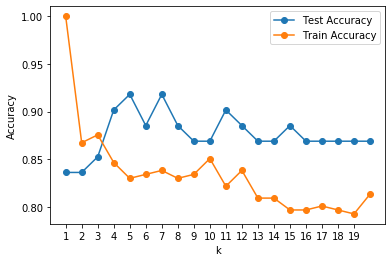

Maximum test accuracy is 91.80% at k=5


In [139]:
# try to find best k value
test_accuracy = []
train_accuracy = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i) 
    knn2.fit(X_train, y_train)
    test_accuracy.append(metrics.accuracy_score(y_test, knn2.predict(X_test)))
    train_accuracy.append(metrics.accuracy_score(y_train, knn2.predict(X_train)))
    
plt.plot(np.arange(1,21), test_accuracy, marker='o', label='Test Accuracy')
plt.plot(np.arange(1,21), train_accuracy, marker='o', label='Train Accuracy')
plt.xticks(np.arange(1,20,1))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Maximum test accuracy is {:.2f}% at k={}".format(max(accuracy)*100,accuracy.index(max(accuracy))+1))
k=accuracy.index(max(accuracy))+1

Training Results:
Number of mislabeled points out of a total 241 points : 41
Accuracy: 82.99%
Precision Score: 83.97%
Recall Score: 84.62%
F1 Score: 84.29%
Confusion Matrix:
[[ 90  21]
 [ 20 110]]


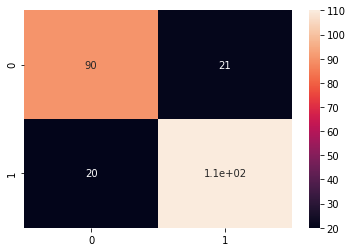

Testing Results
Number of mislabeled points out of a total 61 points : 5
Accuracy: 91.80%
Precision Score: 96.77%
Recall Score: 88.24%
F1 Score: 92.31%
Confusion Matrix:
[[26  1]
 [ 4 30]]


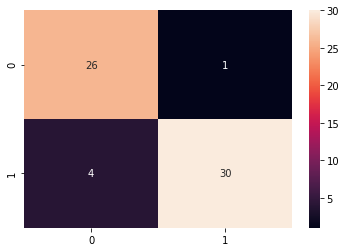

In [140]:
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(X_train, y_train)

#save the model
pickle.dump(knn, open('models/KNN.sav', 'wb'))

#Training accuracy
y_pred=knn.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=knn.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


Area under the curve(AUC value): 0.9580610021786492


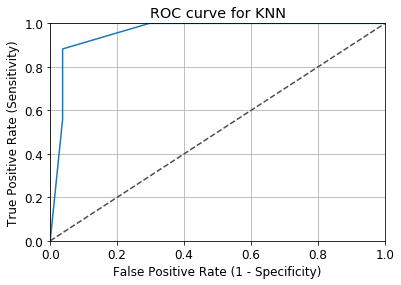

In [172]:
y_pred_quant = knn.predict_proba(X_test)[:, 1]
y_pred_bin = knn.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)  

print("Area under the curve(AUC value):",auc(fpr, tpr))

In [141]:
test_score = metrics.accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, knn.predict(X_train)) * 100

new_entry = pd.DataFrame(data=[["KNN", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results = results.append(new_entry, ignore_index=True)
results


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.402490,88.524590
1,KNN,82.987552,91.803279


## Support Vector Machine (SVM)
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

Training Results:
Number of mislabeled points out of a total 241 points : 26
Accuracy: 89.21%
Precision Score: 87.14%
Recall Score: 93.85%
F1 Score: 90.37%
Confusion Matrix:
[[ 93  18]
 [  8 122]]


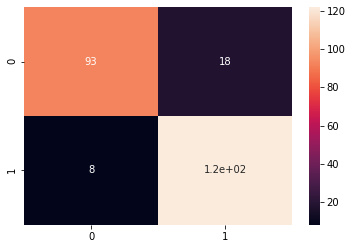

Testing Results
Number of mislabeled points out of a total 61 points : 5
Accuracy: 91.80%
Precision Score: 91.43%
Recall Score: 94.12%
F1 Score: 92.75%
Confusion Matrix:
[[24  3]
 [ 2 32]]


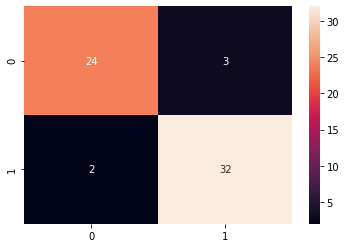

In [142]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

#save the model
pickle.dump(svm, open('models/SVM.sav', 'wb'))

#Training accuracy
y_pred=svm.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=svm.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


In [143]:
test_score = metrics.accuracy_score(y_test, svm.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, svm.predict(X_train)) * 100

new_entry = pd.DataFrame(data=[["SVM", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results = results.append(new_entry, ignore_index=True)
results


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.402490,88.524590
1,KNN,82.987552,91.803279
2,SVM,89.211618,91.803279


## Naive Bayes 
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

Training Results:
Number of mislabeled points out of a total 241 points : 42
Accuracy: 82.57%
Precision Score: 81.43%
Recall Score: 87.69%
F1 Score: 84.44%
Confusion Matrix:
[[ 85  26]
 [ 16 114]]


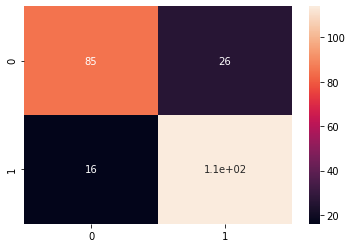

Testing Results
Number of mislabeled points out of a total 61 points : 6
Accuracy: 90.16%
Precision Score: 91.18%
Recall Score: 91.18%
F1 Score: 91.18%
Confusion Matrix:
[[24  3]
 [ 3 31]]


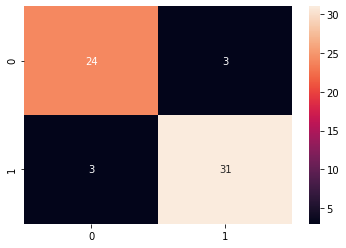

In [144]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

#save the model
pickle.dump(gnb, open('models/NaiveBayes.sav', 'wb'))

#Training accuracy
y_pred=gnb.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=gnb.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


Area under the curve(AUC value): 0.9150326797385621


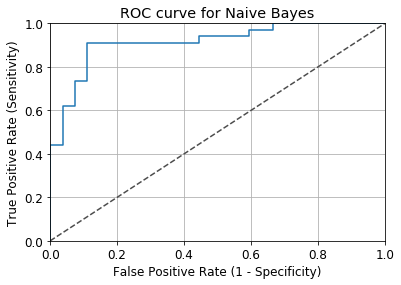

In [176]:
y_pred_quant = gnb.predict_proba(X_test)[:, 1]
y_pred_bin = gnb.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Naive Bayes')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)  

print("Area under the curve(AUC value):",auc(fpr, tpr))

In [145]:
test_score = metrics.accuracy_score(y_test, gnb.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, gnb.predict(X_train)) * 100

new_entry = pd.DataFrame(data=[["Naive Bayes", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results = results.append(new_entry, ignore_index=True)
results


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.402490,88.524590
1,KNN,82.987552,91.803279
2,SVM,89.211618,91.803279
3,Naive Bayes,82.572614,90.163934


## Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Training Results:
Number of mislabeled points out of a total 241 points : 32
Accuracy: 86.72%
Precision Score: 85.51%
Recall Score: 90.77%
F1 Score: 88.06%
Confusion Matrix:
[[ 91  20]
 [ 12 118]]


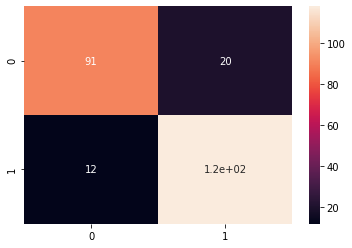

Testing Results
Number of mislabeled points out of a total 61 points : 10
Accuracy: 83.61%
Precision Score: 83.33%
Recall Score: 88.24%
F1 Score: 85.71%
Confusion Matrix:
[[21  6]
 [ 4 30]]


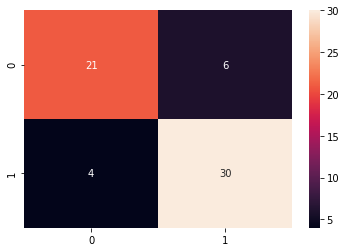

In [146]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dt.fit(X_train, y_train)

#save the model
pickle.dump(dt, open('models/DecisionTree.sav', 'wb'))

#Training accuracy
y_pred=dt.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=dt.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


Area under the curve(AUC value): 0.8197167755991286


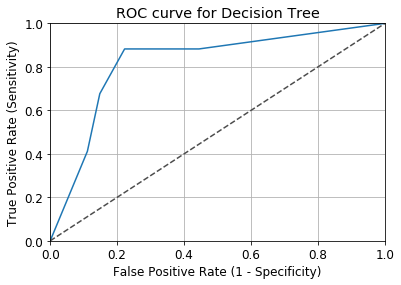

In [175]:
y_pred_quant = dt.predict_proba(X_test)[:, 1]
y_pred_bin = dt.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)  

print("Area under the curve(AUC value):",auc(fpr, tpr))

In [147]:
test_score = metrics.accuracy_score(y_test, dt.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, dt.predict(X_train)) * 100

new_entry = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results = results.append(new_entry, ignore_index=True)
results


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.402490,88.524590
1,KNN,82.987552,91.803279
2,SVM,89.211618,91.803279
3,Naive Bayes,82.572614,90.163934
4,Decision Tree,86.721992,83.606557


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees. It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

Training Results:
Number of mislabeled points out of a total 241 points : 0
Accuracy: 100.00%
Precision Score: 100.00%
Recall Score: 100.00%
F1 Score: 100.00%
Confusion Matrix:
[[111   0]
 [  0 130]]


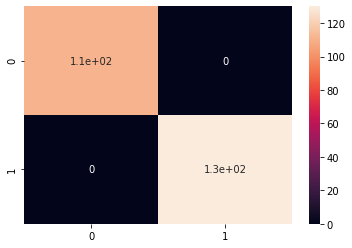

Testing Results
Number of mislabeled points out of a total 61 points : 8
Accuracy: 86.89%
Precision Score: 90.62%
Recall Score: 85.29%
F1 Score: 87.88%
Confusion Matrix:
[[24  3]
 [ 5 29]]


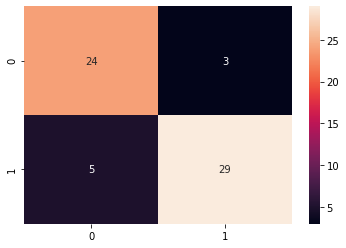

In [148]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

#save the model
pickle.dump(rf, open('models/RandomForest.sav', 'wb'))

#Training accuracy
y_pred=rf.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=rf.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


Area under the curve(AUC value): 0.9455337690631809


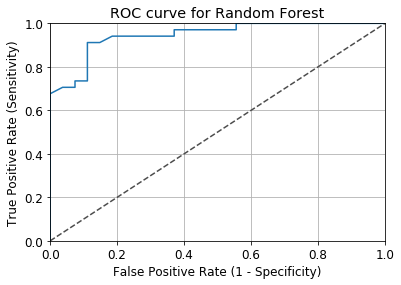

In [177]:
y_pred_quant = rf.predict_proba(X_test)[:, 1]
y_pred_bin = rf.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)  

print("Area under the curve(AUC value):",auc(fpr, tpr))

In [149]:
test_score = metrics.accuracy_score(y_test, rf.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, rf.predict(X_train)) * 100

new_entry = pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results = results.append(new_entry, ignore_index=True)
results


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.402490,88.524590
1,KNN,82.987552,91.803279
2,SVM,89.211618,91.803279
3,Naive Bayes,82.572614,90.163934
4,Decision Tree,86.721992,83.606557
5,Random Forest,100.000000,86.885246


## Perceptron
The Perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

Training Results:
Number of mislabeled points out of a total 241 points : 41
Accuracy: 82.99%
Precision Score: 82.48%
Recall Score: 86.92%
F1 Score: 84.64%
Confusion Matrix:
[[ 87  24]
 [ 17 113]]


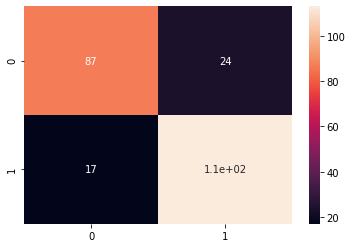

Testing Results
Number of mislabeled points out of a total 61 points : 10
Accuracy: 83.61%
Precision Score: 85.29%
Recall Score: 85.29%
F1 Score: 85.29%
Confusion Matrix:
[[22  5]
 [ 5 29]]


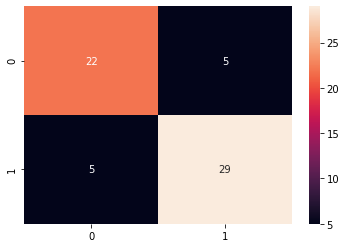

In [150]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

#save the model
pickle.dump(perceptron, open('models/Perceptron.sav', 'wb'))

#Training accuracy
y_pred=perceptron.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=perceptron.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


In [151]:
test_score = metrics.accuracy_score(y_test, perceptron.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, perceptron.predict(X_train)) * 100

new_entry = pd.DataFrame(data=[["Perceptron", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results = results.append(new_entry, ignore_index=True)
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.402490,88.524590
1,KNN,82.987552,91.803279
2,SVM,89.211618,91.803279
3,Naive Bayes,82.572614,90.163934
4,Decision Tree,86.721992,83.606557
5,Random Forest,100.000000,86.885246
6,Perceptron,82.987552,83.606557


## Stochastic Gradient Descent
Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in big data applications this reduces the computational burden, achieving faster iterations in trade for a slightly lower convergence rate.

Training Results:
Number of mislabeled points out of a total 241 points : 37
Accuracy: 84.65%
Precision Score: 84.44%
Recall Score: 87.69%
F1 Score: 86.04%
Confusion Matrix:
[[ 90  21]
 [ 16 114]]


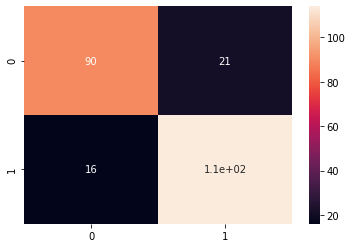

Testing Results
Number of mislabeled points out of a total 61 points : 9
Accuracy: 85.25%
Precision Score: 85.71%
Recall Score: 88.24%
F1 Score: 86.96%
Confusion Matrix:
[[22  5]
 [ 4 30]]


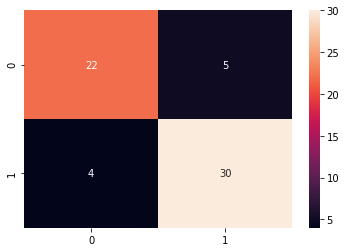

In [152]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)

#save the model
pickle.dump(sgd, open('models/GradientDescent.sav', 'wb'))

#Training accuracy
y_pred=sgd.predict(X_train)
print("Training Results:")
modelAccuracy(X_train,y_train,y_pred)

#Testing accuracy
y_pred=sgd.predict(X_test)
print("Testing Results")
modelAccuracy(X_test,y_test,y_pred)


In [153]:
test_score = metrics.accuracy_score(y_test, sgd.predict(X_test)) * 100
train_score = metrics.accuracy_score(y_train, sgd.predict(X_train)) * 100

new_entry = pd.DataFrame(data=[["Stochastic Gradient Descent", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results = results.append(new_entry, ignore_index=True)
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.402490,88.524590
1,KNN,82.987552,91.803279
2,SVM,89.211618,91.803279
3,Naive Bayes,82.572614,90.163934
4,Decision Tree,86.721992,83.606557
5,Random Forest,100.000000,86.885246
6,Perceptron,82.987552,83.606557
7,Stochastic Gradient Descent,84.647303,85.245902


8 models have been trained on the dataset. The classifiers are ordered in terms of testing accuracy. We can see that KNN and SVM show the highest testing accuracy.

In [158]:
results=results.sort_values(by=["Testing Accuracy %","Training Accuracy %"],ascending=False)
results

,Model,Training Accuracy %,Testing Accuracy %
2,SVM,89.211618,91.803279
1,KNN,82.987552,91.803279
3,Naive Bayes,82.572614,90.163934
0,Logistic Regression,83.402490,88.524590
5,Random Forest,100.000000,86.885246
7,Stochastic Gradient Descent,84.647303,85.245902
4,Decision Tree,86.721992,83.606557
6,Perceptron,82.987552,83.606557


In [159]:
results.to_csv("model_results.csv",index=False)

## Major Causes of Heart Disease
shap function is used. It works by showing the influence of the values of every variable in a single row, compared to their baseline values. This function is supported by random forest and decision tree classifiers. Since random forest classifier shows higher accuracy, the function is applied on this model.

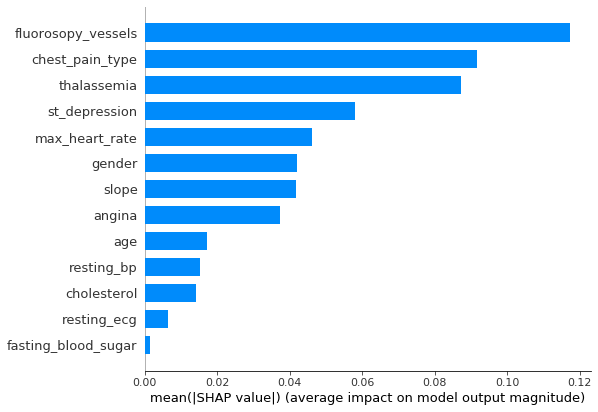

In [188]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

We can also see the summary plot of shap.

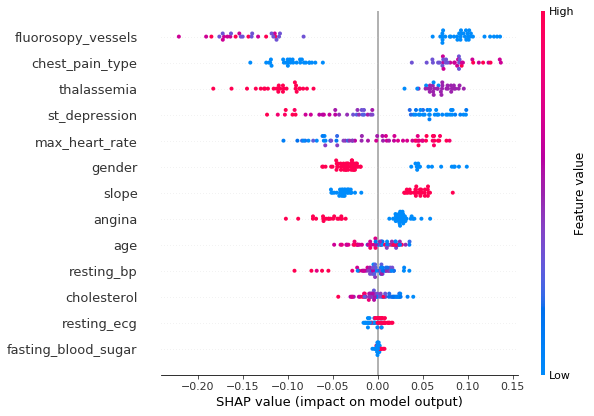

In [108]:
shap.summary_plot(shap_values[1], X_test)

For this model we can see that the major influencers are fluorosopy_vessels i.e number of major vessels, the chest pain type and thalassemia value. They also show a  clear separation in the summary plot shown above. Next, we'll check permutation importance. Permutation importance involves shuffling individual variables in the validation data, and seeing the effect on accuracy. The function calculates the feature importance of estimators for a given dataset. 

In [192]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0426 ± 0.0445,chest_pain_type
0.0361 ± 0.0889,fluorosopy_vessels
0.0197 ± 0.0525,angina
0.0164 ± 0.0207,gender
0.0164 ± 0.0415,max_heart_rate
0.0098 ± 0.0262,slope
0.0033 ± 0.0131,cholesterol
0.0000 ± 0.0207,resting_ecg
0 ± 0.0000,fasting_blood_sugar
0.0000 ± 0.0293,resting_bp


Partial dependence plots (PDP) show the dependence between the target response 1 and a set of ‘target’ features, marginalizing over the values of all other features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the ‘target’ features. We will find the PDP for the non-categorical attributes.

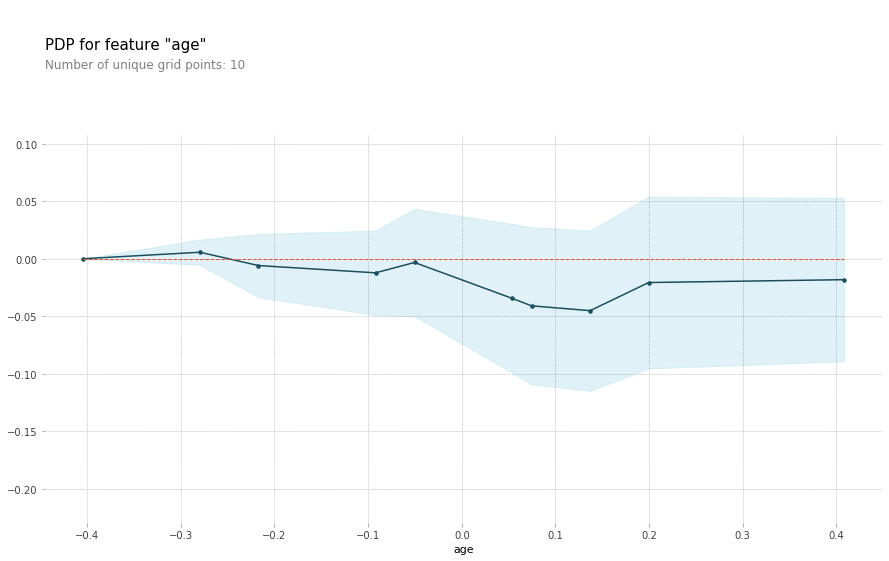

In [200]:
from pdpbox import pdp, info_plots

base_features = data.columns.values.tolist()
base_features.remove('target')

feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

This predicts that the higher the age, the less likely it is to get heart disease. This matches with our observation of the data during descriptive analysis.

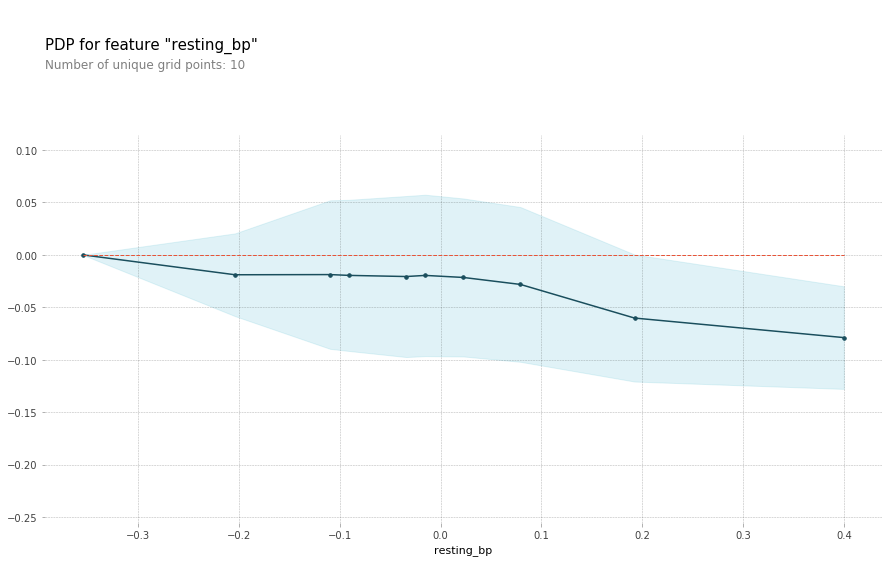

In [202]:
feat_name = 'resting_bp'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

This says that those with lower resting blood pressure are less likely to have heart disease.

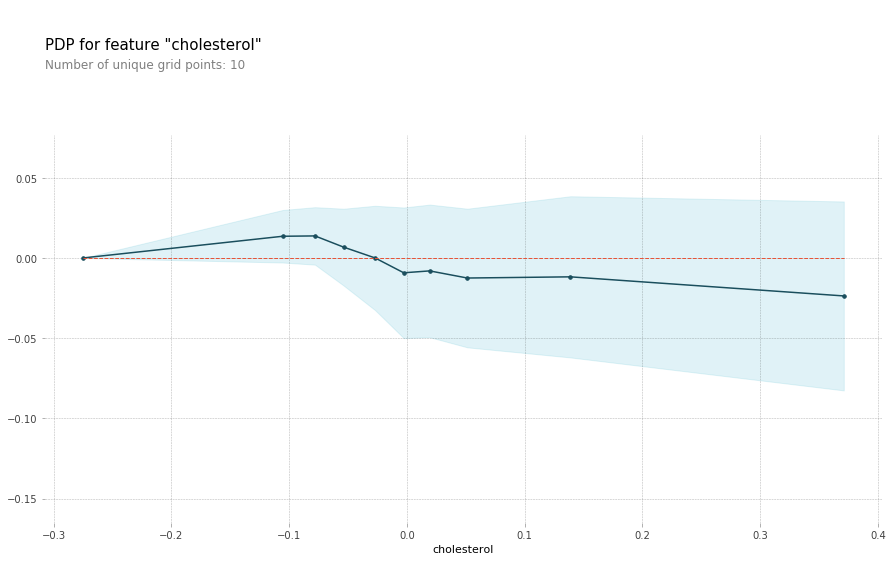

In [203]:
feat_name = 'cholesterol'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

This predicts that those with lower cholesterol are less likely to have heart disease.

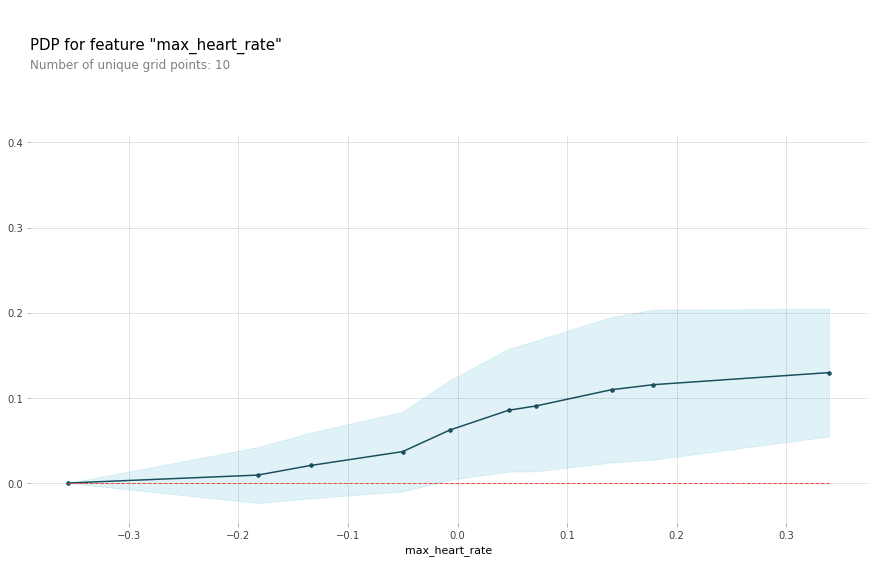

In [206]:
feat_name = 'max_heart_rate'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

This shows that those with higher maximum heart rate are more likely to be predicted as having heart disease.

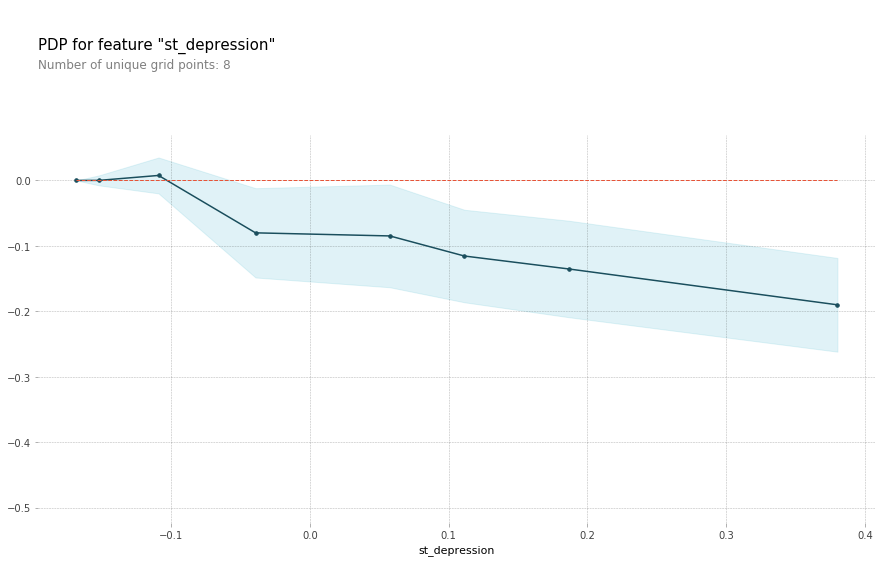

In [207]:
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The st_depression field is the ST depression induced by exercise relative to rest. It relates to findings from an electrocardiogram. So the more the depression in the reading, the less likely a person is to have heart disease.

## Conclusion
We trained 8 different kinds of models and showed good accuracy levels for the dataset. We saw that the major contributers in prediction are the number of fluorosopy vessels, chest pain type and thalassemia value. We also some general trends in terms of prediction wrt various attributes. 